**What common qualities do all employed developers share? **


**CRISP-DM Process:** 
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data modeling
5. Evaluate the Results 

**Business Understanding** 

For this project, I was interseted in using Stack Overflow data from 2017 to get a better understanding of what do majority of employed developers have in common: 
1. Does your hobby play a major role? 
2. Does education play a major role?
3. How does your major play a role?  

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [2]:
pwd

'C:\\Users\\shifa\\Documents\\Data Science Course\\Data Science Blog Post'

**Data Understading**

Below I have provided a general view of the data from the 2017 survey. 

In [3]:
import pandas as pd
#This code outputs the Stack Overflow Data - 2017 Survey
df = pd.read_csv(r"C:/Users/shifa/Documents/Data Science Course/Data Science Blog Post/survey_results_public2017.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [62]:
def bar(variable, column, title):
    status_vals = df[column].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);
    bar(df,"ProgramHobby", "Do you enjoy coding in you free time?")
    bar(df, "MajorUndergrad", "Amount of people working full time")

In [ ]:
bar(df,"ProgramHobby", "Do you enjoy coding in you free time?")

RecursionError: maximum recursion depth exceeded in comparison

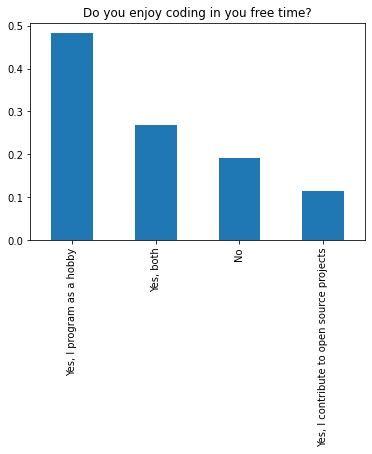

In [63]:
#Amount of people who got an education
bar(df, "FormalEducation", "What is your formal education?")

In [ ]:
import matplotlib.pyplot as plt
bar(df, "MajorUndergrad", "Amount of people working full time")

In [ ]:
bar(df, "MajorUndergrad", "Amount of people working full time")

In [ ]:
bar(df, "EmploymentStatus", "Employment Status")

**Preparing Data**

Selecting specific columns: 
1. Hobby 
2. Education
3. Undergrad Major
4. Employment Status: Are these individuals also getting employed 

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


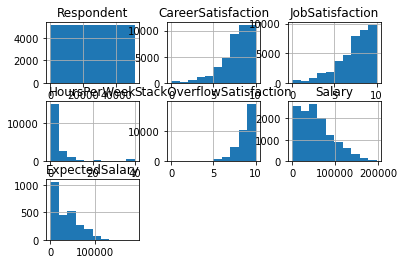

In [97]:
df.hist();

In [98]:
df.nunique()

Respondent              51392
Professional                5
ProgramHobby                4
Country                   201
University                  4
                        ...  
QuestionsInteresting        5
QuestionsConfusing          5
InterestedAnswers           5
Salary                   3049
ExpectedSalary            685
Length: 154, dtype: int64

In [112]:
q1 = df[['Respondent','Professional', 'ProgramHobby', 'FormalEducation','EmploymentStatus','MajorUndergrad']]

q1 = q1[q1.Professional == "Professional developer"]
q1.head()

,Respondent,Professional,ProgramHobby,FormalEducation,EmploymentStatus,MajorUndergrad
2,3,Professional developer,"Yes, both",Bachelor's degree,Employed full-time,Computer science or software engineering
4,5,Professional developer,"Yes, I program as a hobby",Master's degree,Employed full-time,Computer science or software engineering
7,8,Professional developer,"Yes, both",Master's degree,Employed full-time,Computer science or software engineering
8,9,Professional developer,"Yes, I program as a hobby",Bachelor's degree,Employed full-time,Computer science or software engineering
9,10,Professional developer,"Yes, I program as a hobby",Master's degree,"Independent contractor, freelancer, or self-em...",Computer science or software engineering


In [124]:
df.Professional.value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

In [125]:
df.ProgramHobby.value_counts()

Yes, I program as a hobby                    24801
Yes, both                                    13756
No                                            9787
Yes, I contribute to open source projects     3048
Name: ProgramHobby, dtype: int64

In [126]:
df.FormalEducation.value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

In [127]:
df.MajorUndergrad.value_counts()

Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                                          592
Psychology          

**Data Modelling**

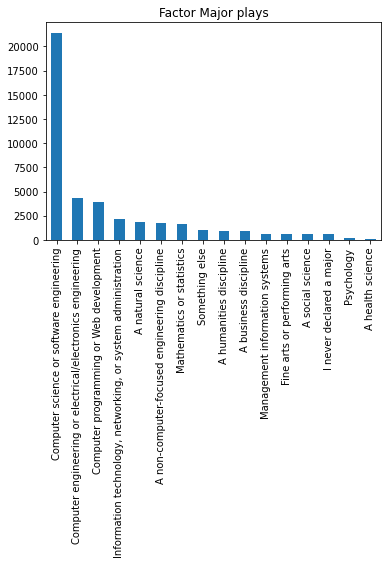

In [8]:
developer = df.MajorUndergrad.str.split(';', expand=True).stack().value_counts()
developer.plot(kind='bar')
plt.title('Factor Major plays');

In [ ]:
q3 = df[['Professional', 'ProgramHobby', 'MajorUndergrad','FormalEducation']]

q3 = q3[q3.Professional == "Professional developer"]
q3 = q3.drop('Professional', 1)
q3.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os


In [ ]:
dataframe = dataframe.sort_values('Professional', ascending = False)
dataframe2 = dataframe.sort_values('ProgramHobby', ascending = False)
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot 

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
%matplotlib inline


36131
Yes, I program as a hobby | 16335
Yes, I contribute to open source projects | 2243
Yes, both | 10021
No | 7532


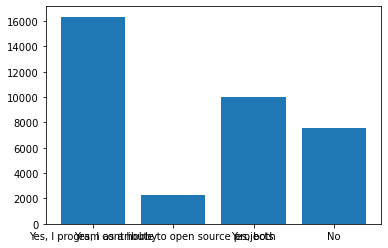

In [39]:
#Program Hobby vs. Professional Developer
filtered_hobby = []
i = 0
for pro in df.Professional:
    if pro == "Professional developer":
        filtered_hobby.append(df.ProgramHobby[i])
    i += 1

print(len(filtered_hobby))


data = {
    'Yes, I program as a hobby': 0,
    'Yes, I contribute to open source projects': 0,
    'Yes, both': 0,
    'No': 0
}

for hobby in filtered_hobby:
    data[hobby] += 1

for key, value in data.items():
    print(key, '|', value)

plt.bar(data.keys(), data.values())

plt.show()

36131
Computer science or software engineering | 17862
Computer engineering or electrical/electronics engineering | 3302
Computer programming or Web development | 2998
Informational technology, networking, or system administration | 0
A non-computer-focused engineering discipline | 1192
Mathematics or statistics | 1120
Something else | 702
A business discipline | 565
Management information systems | 472
Fine arts or performing arts | 478
A social science | 412
I never declared a major | 426
Psychology | 138
A health science | 66


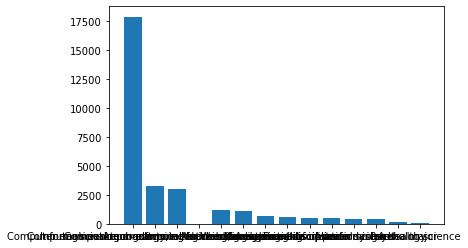

In [72]:
#Major vs. Professional Developer
filtered_major = []
a = 0
for pro in df.Professional:
    if pro == "Professional developer":
        filtered_major.append(str(df.MajorUndergrad[a]))
    a += 1

print(len(filtered_major))
info = {
    'Computer science or software engineering': 0,
    'Computer engineering or electrical/electronics engineering': 0,
    'Computer programming or Web development': 0,
    'Informational technology, networking, or system administration': 0,
    'A non-computer-focused engineering discipline': 0,
    'Mathematics or statistics': 0,
    'Something else': 0,
    'A business discipline': 0,
    'Management information systems': 0,
    'Fine arts or performing arts': 0,
    'A social science': 0,
    'I never declared a major': 0,
    'Psychology': 0,
    'A health science': 0
}

for major in filtered_major:
    try:
        info[major] += 1
    except KeyError as e:
        pass
for key, value in info.items():
    print(key, '|', value)

plt.bar(info.keys(), info.values())

plt.show() 

36131
Bachelor's degree | 17290
Master's degree | 8983
Some college/university study without earning a bachelor's degree | 5390
Secondary school | 2280
Doctoral degree | 791
Primary/elementary school | 204
Professional degree | 543
I never completed any formal education | 261


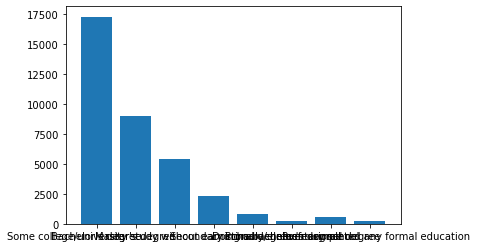

In [78]:
#Formal Education vs. Professional Developer
filtered_education = []
i = 0
for pro in df.Professional:
    if pro == "Professional developer":
        filtered_education.append(str(df.FormalEducation[i]))
    i += 1

print(len(filtered_education))
d = {
    'Bachelor\'s degree': 0,
    'Master\'s degree': 0,
    'Some college/university study without earning a bachelor\'s degree': 0,
    'Secondary school': 0,
    'Doctoral degree': 0,
    'Primary/elementary school': 0,
    'Primary/elementary school': 0,
    'Professional degree': 0,
    'I never completed any formal education': 0
}


for ed in filtered_education:
    try:
        d[ed] += 1
    except KeyError as e:
        pass
for key, value in d.items():
    print(key, '|', value)

plt.bar(d.keys(), d.values())

plt.show() 

**EVALUATING RESULTS**

Through our results we can draw the conclusion that majority of those who become professional developers program as a hobby, carry some higher degree either bachelor, masters, or PHD, and chose a programming related major. 